# Classic Computer Science Problems in Python
### David Kopec, Manning, 2019
Source code: https://github.com/davecom/ClassicComputerScienceProblemsInPython

Workbook by: Caterina Trainito, 2020-02-09

## Chaper 1: Small problems

### 1.1 The Fibonacci sequence

Let's create an abstract base class for all our Fibonacci implementations.

In [91]:
from abc import ABC, abstractmethod

class Fib(ABC):
    def __init__(self):
        self.n_calls = 0

    @abstractmethod
    def run(self, n: int, incr: bool = True) -> int:
        pass
    
    def get_ncalls(self, n: int) -> int:
        self.run(n)
        return self.n_calls
    
    def printn(self, n: int) -> str:
        result = self.run(n)
        sum_str = n if n < 2 else f'{self.run(n-2, incr=False)} + {self.run(n-1, incr=False)}'
        return f'{self.__class__.__name__}({n}) = {sum_str} = {result} -> {self.n_calls} calls'


#### Recursive plain
Just the classic Fibonacci formula.

In [92]:
class RecursiveFib(Fib):
    def __init__(self):
        super().__init__()
        
    def run(self, n: int, incr: bool = True) -> int:
        if incr: self.n_calls += 1
        if n < 2:  # base case
            return n
        return self.run(n-2, incr=incr) + self.run(n-1, incr=incr) # recursive case

    
for i in range(11):
    print(RecursiveFib().printn(i))
print(RecursiveFib().printn(20))

RecursiveFib(0) = 0 = 0 -> 1 calls
RecursiveFib(1) = 1 = 1 -> 1 calls
RecursiveFib(2) = 0 + 1 = 1 -> 3 calls
RecursiveFib(3) = 1 + 1 = 2 -> 5 calls
RecursiveFib(4) = 1 + 2 = 3 -> 9 calls
RecursiveFib(5) = 2 + 3 = 5 -> 15 calls
RecursiveFib(6) = 3 + 5 = 8 -> 25 calls
RecursiveFib(7) = 5 + 8 = 13 -> 41 calls
RecursiveFib(8) = 8 + 13 = 21 -> 67 calls
RecursiveFib(9) = 13 + 21 = 34 -> 109 calls
RecursiveFib(10) = 21 + 34 = 55 -> 177 calls
RecursiveFib(20) = 2584 + 4181 = 6765 -> 21891 calls


#### Recursive with memoization using dict
Uses a dict as homemade cache.

In [93]:
class DictMemoFib(Fib):
    def __init__(self):
        super().__init__()
        self.memo = {0: 0, 1: 1}
        
    def run(self, n: int, incr: bool = True) -> int:
        if incr: self.n_calls += 1
        if n not in self.memo:
            self.memo[n] = self.run(n-2, incr=incr) + self.run(n-1, incr=incr)
        return self.memo[n]

    
for i in range(11):
    print(DictMemoFib().printn(i))
print(DictMemoFib().printn(20))

DictMemoFib(0) = 0 = 0 -> 1 calls
DictMemoFib(1) = 1 = 1 -> 1 calls
DictMemoFib(2) = 0 + 1 = 1 -> 3 calls
DictMemoFib(3) = 1 + 1 = 2 -> 5 calls
DictMemoFib(4) = 1 + 2 = 3 -> 7 calls
DictMemoFib(5) = 2 + 3 = 5 -> 9 calls
DictMemoFib(6) = 3 + 5 = 8 -> 11 calls
DictMemoFib(7) = 5 + 8 = 13 -> 13 calls
DictMemoFib(8) = 8 + 13 = 21 -> 15 calls
DictMemoFib(9) = 13 + 21 = 34 -> 17 calls
DictMemoFib(10) = 21 + 34 = 55 -> 19 calls
DictMemoFib(20) = 2584 + 4181 = 6765 -> 39 calls


#### Recursive with auto-memoization
Uses `lru_cache()` decorator to cache the return value of the function the first time it is called for a given `n`.

In [94]:
from functools import lru_cache

class AutoMemoFib(RecursiveFib):
    def __init__(self):
        super().__init__()
        
    @lru_cache(maxsize=None)
    def run(self, n: int, incr: bool = True) -> int:
        # Same algorithm as recursive implementation
        return super().run(n, incr=incr)

    
for i in range(11):
    print(AutoMemoFib().printn(i))
print(AutoMemoFib().printn(20))

AutoMemoFib(0) = 0 = 0 -> 1 calls
AutoMemoFib(1) = 1 = 1 -> 1 calls
AutoMemoFib(2) = 0 + 1 = 1 -> 3 calls
AutoMemoFib(3) = 1 + 1 = 2 -> 4 calls
AutoMemoFib(4) = 1 + 2 = 3 -> 5 calls
AutoMemoFib(5) = 2 + 3 = 5 -> 6 calls
AutoMemoFib(6) = 3 + 5 = 8 -> 7 calls
AutoMemoFib(7) = 5 + 8 = 13 -> 8 calls
AutoMemoFib(8) = 8 + 13 = 21 -> 9 calls
AutoMemoFib(9) = 13 + 21 = 34 -> 10 calls
AutoMemoFib(10) = 21 + 34 = 55 -> 11 calls
AutoMemoFib(20) = 2584 + 4181 = 6765 -> 21 calls


#### Iterative solution
Any problem that can be solved recursively can also be solved iteratively. In this case, this brings massive perfomance gains!

In [95]:
class IterativeFib(Fib):
    def __init__(self):
        super().__init__()
        
    def run(self, n: int, incr: bool = True) -> int:
        if n < 2:
            if incr: self.n_calls = 1
        if n == 0: return n
        prev: int = 0
        next: int = 1
        for _ in range(1, n):
            # Here, n_calls is the number of loops
            if incr: self.n_calls += 1
            prev, next = next, prev + next
        return next
    
    def printn(self, n: int) -> str:
        return super().printn(n) + ' (for loops)'
    
    
for i in range(11):
    print(IterativeFib().printn(i))
print(IterativeFib().printn(20))

IterativeFib(0) = 0 = 0 -> 1 calls (for loops)
IterativeFib(1) = 1 = 1 -> 1 calls (for loops)
IterativeFib(2) = 0 + 1 = 1 -> 1 calls (for loops)
IterativeFib(3) = 1 + 1 = 2 -> 2 calls (for loops)
IterativeFib(4) = 1 + 2 = 3 -> 3 calls (for loops)
IterativeFib(5) = 2 + 3 = 5 -> 4 calls (for loops)
IterativeFib(6) = 3 + 5 = 8 -> 5 calls (for loops)
IterativeFib(7) = 5 + 8 = 13 -> 6 calls (for loops)
IterativeFib(8) = 8 + 13 = 21 -> 7 calls (for loops)
IterativeFib(9) = 13 + 21 = 34 -> 8 calls (for loops)
IterativeFib(10) = 21 + 34 = 55 -> 9 calls (for loops)
IterativeFib(20) = 2584 + 4181 = 6765 -> 19 calls (for loops)


#### Summary of Fibonacci implementations
Check out the differences on the log scale (second plot)!

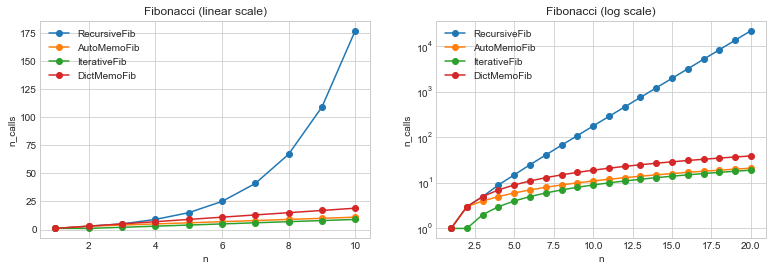

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt


def get_subclasses(cls):
    # recursive function to get all Fibonacci implementations
    # thx to https://stackoverflow.com/a/3862957/10905347
    return set(cls.__subclasses__()).union(
        [s for c in cls.__subclasses__() for s in get_subclasses(c)])


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(13,4))

# Linear scale
ax1 = plt.subplot(121)
x = [i for i in range(1,11)]
for fib in get_subclasses(Fib):
    plt.plot(x, [fib().get_ncalls(i) for i in x], 'o-', label=fib.__name__)
    
ax1.set(xlabel='n', ylabel='n_calls', title='Fibonacci (linear scale)')
plt.legend();

# Log scale
ax2 = plt.subplot(122)
x = [i for i in range(1,21)]
for fib in get_subclasses(Fib):
    plt.plot(x, [fib().get_ncalls(i) for i in x], 'o-', label=fib.__name__)

ax2.set(xlabel='n', ylabel='n_calls', yscale='log', title='Fibonacci (log scale)')
plt.legend();


### 1.2 Trivial compression

In Python, `int` values can be of arbitrary size (number of bits). So you can store any bit string (sequence of 0b0 and 0b1) as an `int`. Stored this way, bit strings are easier to manipulate using bitwise operations.

Let's create a wrapper class for `int` to represent a bit string with words of arbitrary length:

In [227]:
class BitString(object):
    def __init__(self, word_length: int):
        self.word_length = word_length  # number of bits in each word
        self.max_value = 2 ** word_length - 1
        self._bs = 1  # starting bit
        
    def add(self, bits: int) -> None:
        if bits < 0 or bits > self.max_value:
            raise ValueError(f'Value must be between 0 and {self.max_value}, '\
                             f'because this is a {self.word_length}-bit bit string')
        self._bs <<= self.word_length  # left shift adds 0's to the right of the bit string
        self._bs |= bits # OR the new bits with the zero-padding
        
    def print_words(self) -> str:
        return str([bin(w) for w in self])
        
    def __iter__(self):
        max_shift = self.word_length * (len(self)-1)
        word_selector = self.max_value  # selects the last (rightmost) word
        for i in range(max_shift, -1, -self.word_length):
            yield self._bs >> i & word_selector
        
    def __len__(self):
        # number of words in the bit string
        return self._bs.bit_length() // self.word_length

    def __str__(self):
        return bin(self._bs)

    
bs = BitString(3)
bs.add(0)
bs.add(1)
bs.add(3)
bs.add(2)
print(f'Bit string \'{bs}\': {bs.word_length}-bit words, {len(bs)} words total')
print('Words:', bs.print_words())

Bit string '0b1000001011010': 3-bit words, 4 words total
Words: ['0b0', '0b1', '0b11', '0b10']


Implementation of `CompressedGene` using the `BitString` wrapper as the backing data store:

In [225]:
class CompressedGene(object):
    nucleotide_to_bit = {'A':0, 'C':1, 'G':2, 'T':3}
    bit_to_nucleotide = {v: k for k, v in nucleotide_to_bit.items()}
    
    def __init__(self, gene: str):
        self.bit_string = self._compress(gene)
        
    def _compress(self, gene: str) -> BitString:
        bit_string = BitString(2)
        for nucleotide in gene.upper():
            try:
                bit_string.add(self.nucleotide_to_bit[nucleotide])
            except KeyError:
                raise ValueError('Invalid nucleotide: value can only be "A", "C", "G" or "T"')
        return bit_string
                
    def decompress(self) -> str:
        gene_str = ''
        for word in self.bit_string:
            try:
                gene_str += self.bit_to_nucleotide[word]
            except KeyError:
                raise ValueError('Invalid bit: value can only be 0, 1, 2 or 3')
        return gene_str
    
    def __str__(self):
        return self.decompress()
    
    
gene = CompressedGene('agtctt')
print('Decompressed representation:', gene)
print('Compressed representation:', gene.bit_string)

Decompressed representation: AGTCTT
Compressed representation: 0b1001011011111


Compare memory usage of regular string gene vs. compressed bit-string gene:

In [226]:
from sys import getsizeof

original = 'TAGGGATTAACCGTTATATATATATAGCCATGGATCGATTATATAGGGATTAACCGTTATATATATATAGCCATGGATCGATTATA' * 100
compressed = CompressedGene(original)

original_size = getsizeof(original)
compressed_size = getsizeof(compressed.bit_string._bs)

print('Original and decompressed strings are the same:', original == str(compressed))
print('Original size:', original_size, 'bytes')
print('Compressed size:', compressed_size, 'bytes')
print('Compression ratio: {}:{}'.format(original_size // compressed_size, 1))

Original and decompressed strings are the same: True
Original size: 8649 bytes
Compressed size: 2320 bytes
Compression ratio: 3:1


### 1.3 Unbreakable encryption

A one-time pad uses a symmetric key pair, such that:

`Original data + Secret random key -> (encryption) -> Product`, and

`Product + Secret random key -> (decryption) -> Original data`.

Here is a one-time pad for Unicode strings:

In [137]:
from secrets import token_bytes
from sys import byteorder
from typing import Tuple

def gen_random_key(length: int) -> int:
    return int.from_bytes(token_bytes(length), byteorder)

def encrypt(original) -> Tuple[int, int]:
    original_bytes: bytes = original.encode()  # str to bytes
    original_int: int = int.from_bytes(original_bytes, byteorder)
    secret = gen_random_key(len(original_bytes))
    encrypted = original_int ^ secret  # XOR
    return encrypted, secret

def decrypt(encrypted: int, secret: int) -> str:
    decrypted: int = encrypted ^ secret
    decrypted_length: int = (decrypted.bit_length() + 7) // 8  # round up to avoid off-by-one errors
    decrypted_bytes = decrypted.to_bytes(decrypted_length, byteorder)
    return decrypted_bytes.decode()

original = 'This string was encrypted and decrypted using a One-Time Pad. 😍'
decrypt(*encrypt(original))

'This string was encrypted and decrypted using a One-Time Pad. 😍'

**Exercise**: use a one-time pad to encrypt images.
TODO: clean up code.

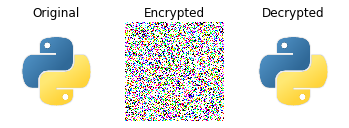

In [76]:
from sys import getsizeof
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib._png as png
import numpy as np


def img_bytes_size():
    return len(original.tobytes())

def nparray_from_bytes(bytesarr, dtype, shape) -> bytes:
    return np.frombuffer(bytesarr, dtype=dtype).reshape(shape)

def encrypt(original: np.ndarray):
    original_bytes: bytes = original.tobytes()
    original_int: int = int.from_bytes(original_bytes, byteorder)
    secret: int = gen_random_key(img_bytes_size())
    encrypted: int = original_int ^ secret  # XOR
    return encrypted, secret, original.shape, original.dtype

def decrypt(encrypted: int, secret: int, array_size, array_type) -> str:
    decrypted: int = encrypted ^ secret
    # decrypted is smaller in size (bytes) -- why?
    # should it not be identical to encrypted and secret?
    decrypted_bytes: bytes = decrypted.to_bytes(img_bytes_size(), byteorder)
    decrypted_array = np.frombuffer(decrypted_bytes, dtype=array_type).reshape(array_size)
    return decrypted_array


img = png.read_png_int('python-logo.png')
original = np.array(img, dtype=int)  # int64
encrypted, _, _, _ = encrypt(original)
encrypted_array = nparray_from_bytes(encrypted.to_bytes(len(original.tobytes()), byteorder), original.dtype, original.shape)
decrypted_array = decrypt(*encrypt(original))

fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(original)
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(np.clip(encrypted_array, 0, 255))
ax[1].set_title('Encrypted')
ax[1].axis('off')
ax[2].imshow(decrypted_array)
ax[2].set_title('Decrypted')
ax[2].axis('off')
plt.show();

### 1.5 The Towers of Hanoi

Here is a solver for the Towers of Hanoi problem for an arbitrary number of discs and towers.

A tower is implemented using a custom `Stack` class. This is just a thin wrapper around Python's built-in list methods `append()` and `pop()`.

Note that the solution for >3 towers still uses just a single auxiliary tower, so it is not optimal. The fastest solution requires a different algorithm that is beyond the scope of this workbook. See https://en.wikipedia.org/wiki/Tower_of_Hanoi#With_four_pegs_and_beyond.

In [256]:
from copy import deepcopy

class Stack(object):
    def __init__(self):
        self._container = []
    
    def push(self, item):
        self._container.append(item)
        
    def pop(self):
        return self._container.pop()
    
    def __bool__(self):
        return self._container
    
    def __eq__(self, other):
        return self.__class__ == other.__class__ and\
                self._container == other._container
        
    def __repr__(self):
        return repr(self._container)
    
    
class HanoiSolver(object):
    def __init__(self, num_towers, num_discs, verbose=False):
        if num_towers < 3:
            raise ValueError('Hanoi Towers problem must have at least 3 towers.')
        if num_discs < 1:
            raise ValueError('Hanoi Towers problem must have at least 1 disc.')
        self.num_towers = num_towers 
        self.num_discs = num_discs
        self.verbose = verbose
        self.count_iter = 0
        self._towers = [Stack() for _ in range(num_towers)]
        for i in range(1, num_discs+1):
            self._towers[0].push(i)  # push all discs on 1st tower
        self._initial_towers = deepcopy(self._towers)  # keep copy of initial state
    
    def hanoi(self, begin, end, temp, n):
        if n == 1:  # base case, final step
            end.push(begin.pop())
            if self.verbose:
                print(self)
            self.count_iter += 1
        else:
            self.hanoi(begin, temp, end, n-1)
            self.hanoi(begin, end, temp, 1)
            self.hanoi(temp, end, begin, n-1)
            
    def run(self):
        if self.verbose:
            print(self)
        self.hanoi(self._towers[0], self._towers[-1], self._towers[1], self.num_discs)
        # Check that solution is valid
        assert self._initial_towers[0] == self._towers[-1], 'Solution is invalid!'
        return self
    
    def __repr__(self):
        return f'{self.__class__.__name__}(num_towers={self.num_towers}, num_discs={self.num_discs})'
    
    def __str__(self):
        return str(self._towers)


hs = HanoiSolver(num_towers=3, num_discs=3, verbose=True)
print(repr(hs))
print(f'\nInitial towers: {hs}\n')
print(f'\nFinal towers: {hs.run()}')
print(f'\nNumber of moves: {hs.count_iter}')

HanoiSolver(num_towers=3, num_discs=3)

Initial towers: [[1, 2, 3], [], []]

[[1, 2, 3], [], []]
[[1, 2], [], [3]]
[[1], [2], [3]]
[[1], [2, 3], []]
[[], [2, 3], [1]]
[[3], [2], [1]]
[[3], [], [1, 2]]
[[], [], [1, 2, 3]]

Final towers: [[], [], [1, 2, 3]]

Number of moves: 7


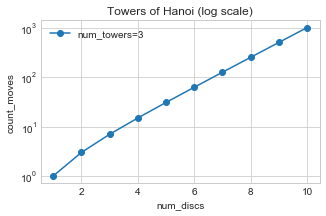

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(5,3))
ax = plt.axes()

num_discs = [i for i in range(1, 11)]

plt.plot(num_discs, [HanoiSolver(3, d).run().count_iter for d in num_discs],
         'o-', label='num_towers=3')
    
ax.set(xlabel='num_discs', ylabel='count_moves', yscale='log',
       title='Towers of Hanoi (log scale)')
plt.legend();